In [1]:
from IPython import display
import os
import subprocess
from rdkit import Chem
from rdkit import RDConfig
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolAlign
from rdkit.Chem import rdShapeHelpers
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import PyMol
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import copy
import pprint

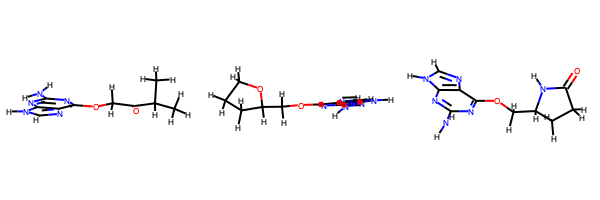

In [2]:
mols = Chem.SDMolSupplier('./before_align_cdk2.sdf', removeHs=False)
cdk2mol = [m for m in mols]
for m in cdk2mol:
    AllChem.EmbedMolecule(m, AllChem.ETKDGv2())
Draw.MolsToGridImage(cdk2mol)

In [3]:
cdk2mol2 = copy.deepcopy(cdk2mol)

In [4]:
crippen_contribs = [rdMolDescriptors._CalcCrippenContribs(mol) for mol in cdk2mol2]

In [5]:
ref = cdk2mol2[0]
ref_contrib = crippen_contribs[0]
targets = cdk2mol2[1:]
targets_contrib = crippen_contribs[1:]

In [6]:
for i, target in enumerate(targets):
    crippenO3A = rdMolAlign.GetCrippenO3A(target, ref, targets_contrib[i], ref_contrib)
    crippenO3A.Align()

In [7]:
w = Chem.SDWriter('./align_cdk2.sdf')
w.write(ref)
for mol in targets:
    w.write(mol)
w.close()

In [8]:
showfeatpath = os.path.join(RDConfig.RDCodeDir, 'Chem/Features/ShowFeats.py')

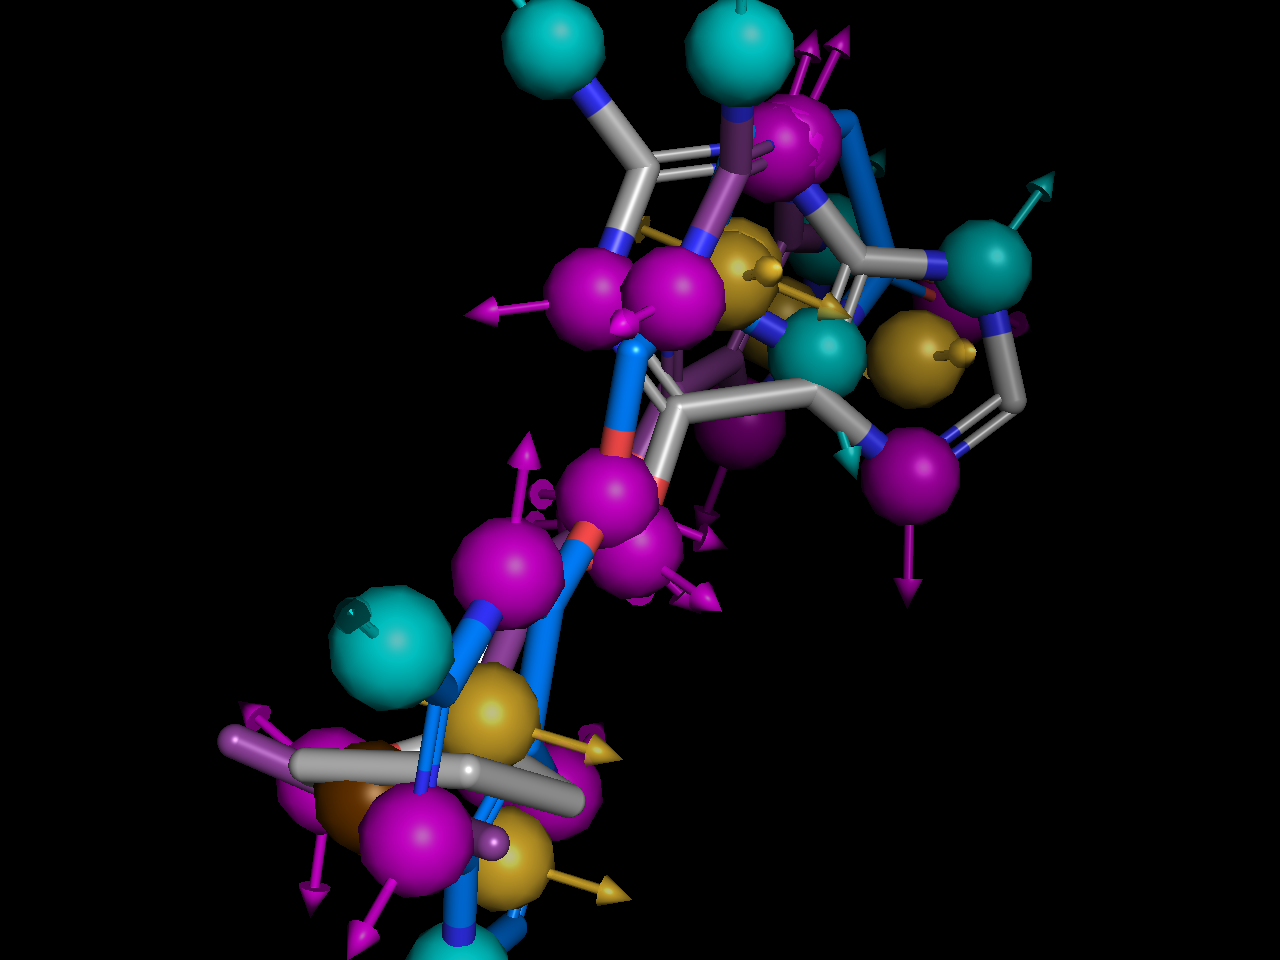

In [9]:
# Before align
v = PyMol.MolViewer()
v.DeleteAll()
process = subprocess.Popen(['python', showfeatpath, '--writeFeats','./before_align_cdk2.sdf'], stdout=subprocess.PIPE)
stdout = process.communicate()[0]
png=v.GetPNG()
display.display(png)

In [10]:
res = stdout.decode('utf-8').replace('\t', ' ').split('\n')
pprint.pprint(res)

['# Family    X     Y    Z    Radius  # Atom_ids',
 'Donor -4.638 -1.543 0.557 1.0 # 11',
 'Donor -2.662 -2.347 0.948 1.0 # 13',
 'Donor -3.861 0.680 -0.232 1.0 # 14',
 'Donor -2.927 2.788 -0.970 1.0 # 17',
 'Acceptor 2.060 -1.918 1.009 1.0 # 5',
 'Acceptor -0.131 -0.796 0.490 1.0 # 7',
 'Acceptor -2.662 -2.347 0.948 1.0 # 13',
 'Acceptor -3.861 0.680 -0.232 1.0 # 14',
 'Acceptor -1.566 0.922 -0.214 1.0 # 16',
 'PosIonizable -3.507 -1.639 0.645 1.0 # 9 13 12 11 10',
 'Aromatic -3.507 -1.639 0.645 1.0 # 9 10 11 12 13',
 'Aromatic -2.650 0.175 0.013 1.0 # 8 9 10 14 15 16',
 'Hydrophobe 3.594 -0.279 0.473 1.0 # 2',
 'LumpedHydrophobe 3.766 0.220 0.281 1.0 # 2 1 3',
 'Donor -4.172 -1.175 -1.607 1.0 # 2',
 'Donor -2.128 -2.011 -1.484 1.0 # 5',
 'Donor -3.648 0.771 -0.175 1.0 # 9',
 'Donor -2.988 2.608 1.229 1.0 # 10',
 'Acceptor -2.128 -2.011 -1.484 1.0 # 5',
 'Acceptor -1.447 0.906 0.627 1.0 # 7',
 'Acceptor -3.648 0.771 -0.175 1.0 # 9',
 'Acceptor 0.110 -0.772 0.045 1.0 # 11',
 'Acceptor 

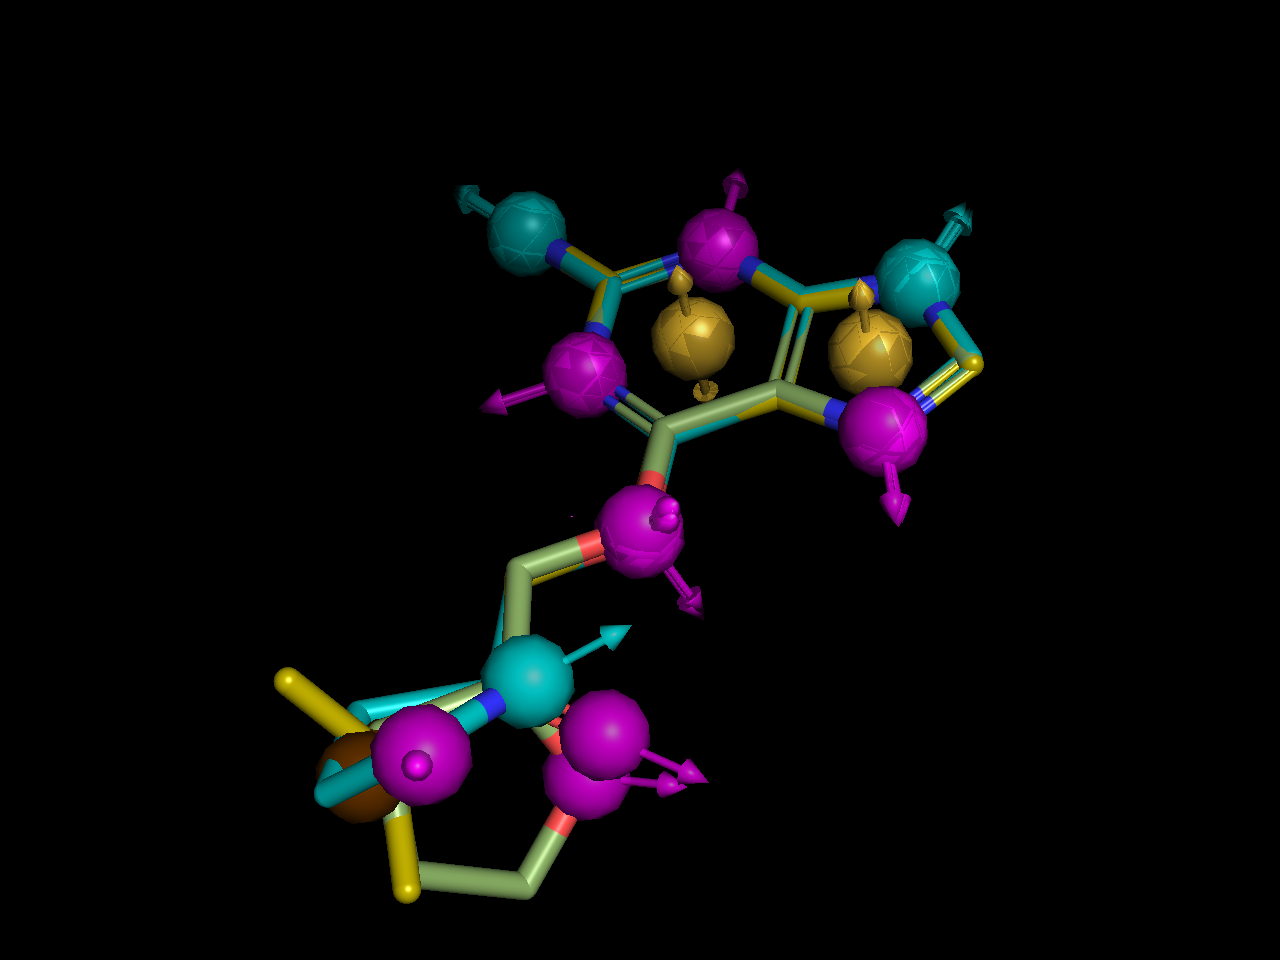

In [11]:
#After align
v = PyMol.MolViewer()
v.DeleteAll()
process = subprocess.Popen(['python', showfeatpath,'--writeFeats','./align_cdk2.sdf'], stdout=subprocess.PIPE)
stdout = process.communicate()[0]
png=v.GetPNG()
display.display(png)

In [12]:
res = stdout.decode('utf-8').replace('\t', ' ').split('\n')
pprint.pprint(res)

['# Family    X     Y    Z    Radius  # Atom_ids',
 'Donor -4.447 -0.580 -2.127 1.0 # 11',
 'Donor -2.369 -0.730 -2.637 1.0 # 13',
 'Donor -4.121 -0.009 0.275 1.0 # 14',
 'Donor -3.602 0.536 2.585 1.0 # 17',
 'Acceptor 2.288 -0.534 -1.549 1.0 # 5',
 'Acceptor -0.161 -0.294 -0.684 1.0 # 7',
 'Acceptor -2.369 -0.730 -2.637 1.0 # 13',
 'Acceptor -4.121 -0.009 0.275 1.0 # 14',
 'Acceptor -1.919 0.112 0.908 1.0 # 16',
 'PosIonizable -3.325 -0.576 -2.046 1.0 # 9 13 12 11 10',
 'Aromatic -3.325 -0.576 -2.046 1.0 # 9 10 11 12 13',
 'Aromatic -2.826 -0.102 -0.038 1.0 # 8 9 10 14 15 16',
 'Hydrophobe 3.473 -0.083 0.406 1.0 # 2',
 'LumpedHydrophobe 3.899 0.272 0.319 1.0 # 2 1 3',
 'Donor -4.491 -0.607 -2.118 1.0 # 2',
 'Donor -2.390 -0.682 -2.613 1.0 # 5',
 'Donor -4.131 -0.045 0.283 1.0 # 9',
 'Donor -3.541 0.496 2.576 1.0 # 10',
 'Acceptor -2.390 -0.682 -2.613 1.0 # 5',
 'Acceptor -1.879 0.136 0.883 1.0 # 7',
 'Acceptor -4.131 -0.045 0.283 1.0 # 9',
 'Acceptor -0.163 -0.211 -0.758 1.0 # 11',
 '